Данный ноутбук содержит анализ данных из файла Data_Entry_2017_v2020.csv.

Файл Data_Entry_2017_v2020.csv вы можете скачать по ссылке: https://nihcc.app.box.com/v/ChestXray-NIHCC

# Библиотеки

In [57]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd 
import warnings
import seaborn as sns
warnings.filterwarnings('ignore', category=FutureWarning)

# Данные

In [48]:
df = pd.read_csv('Data Kaggle/Data_Entry_2017_v2020.csv')
df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168
...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,38,M,PA,2048,2500,0.168,0.168
112116,00030802_000.png,No Finding,0,30802,28,M,PA,2048,2500,0.168,0.168
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168
112118,00030804_000.png,No Finding,0,30804,29,F,PA,2048,2500,0.168,0.168


In [49]:
df.shape

(112120, 11)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 9.4+ MB


# Пациенты

In [51]:
unique_patients = df['Patient ID'].nunique()

print(f'Количество уникальных пациентов: {unique_patients}')

Количество уникальных пациентов: 30805


In [52]:
patient_image_count = df.groupby('Patient ID')['Image Index'].count()

print(f'Минимальное количество снимков для одного пациента: {patient_image_count.min()}')
print(f'Максимальное количество снимков для одного пациента: {patient_image_count.max()}')

Минимальное количество снимков для одного пациента: 1
Максимальное количество снимков для одного пациента: 184


# Патологии

Finding Labels
No Finding            60361
Infiltration          19894
Effusion              13317
Atelectasis           11559
Nodule                 6331
Mass                   5782
Pneumothorax           5302
Consolidation          4667
Pleural_Thickening     3385
Cardiomegaly           2776
Emphysema              2516
Edema                  2303
Fibrosis               1686
Pneumonia              1431
Hernia                  227
Name: count, dtype: int64


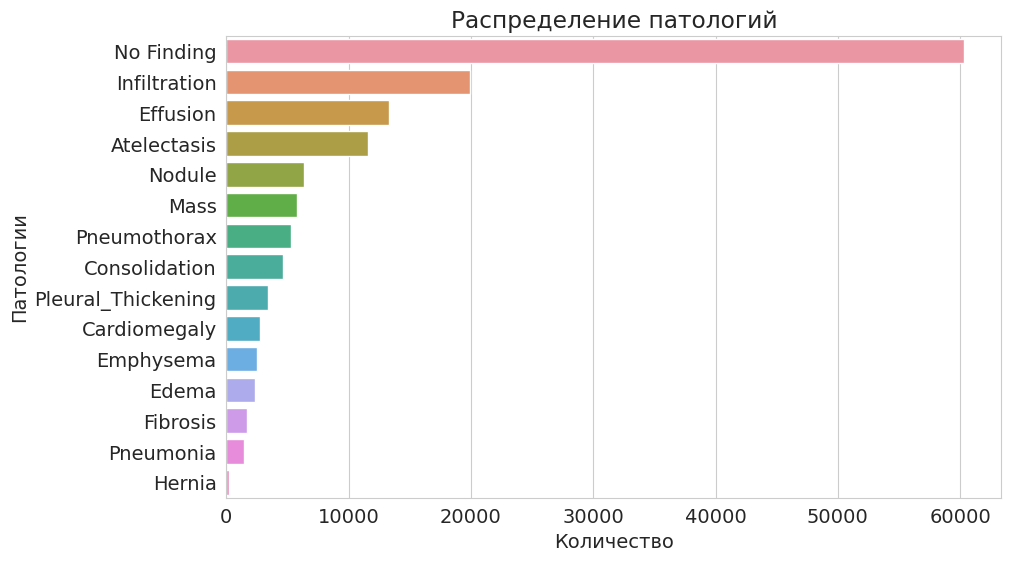

In [60]:
pathology_counts = df['Finding Labels'].str.split('|').explode().value_counts()
print(pathology_counts)

sorted_index = pathology_counts.index

plt.figure(figsize=(10, 6))
sns.countplot(y=df['Finding Labels'].str.split('|').explode(), order=sorted_index)
plt.title('Распределение патологий')
plt.xlabel('Количество')
plt.ylabel('Патологии')
plt.show()

# Возраст

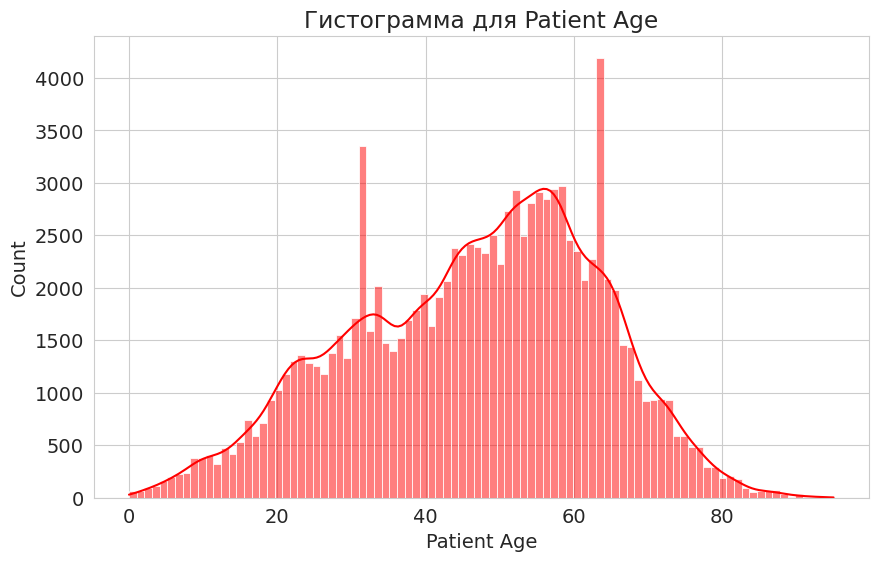

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Patient Age', kde=True, color='red')
plt.title('Гистограмма для Patient Age')
plt.show()

# Вид

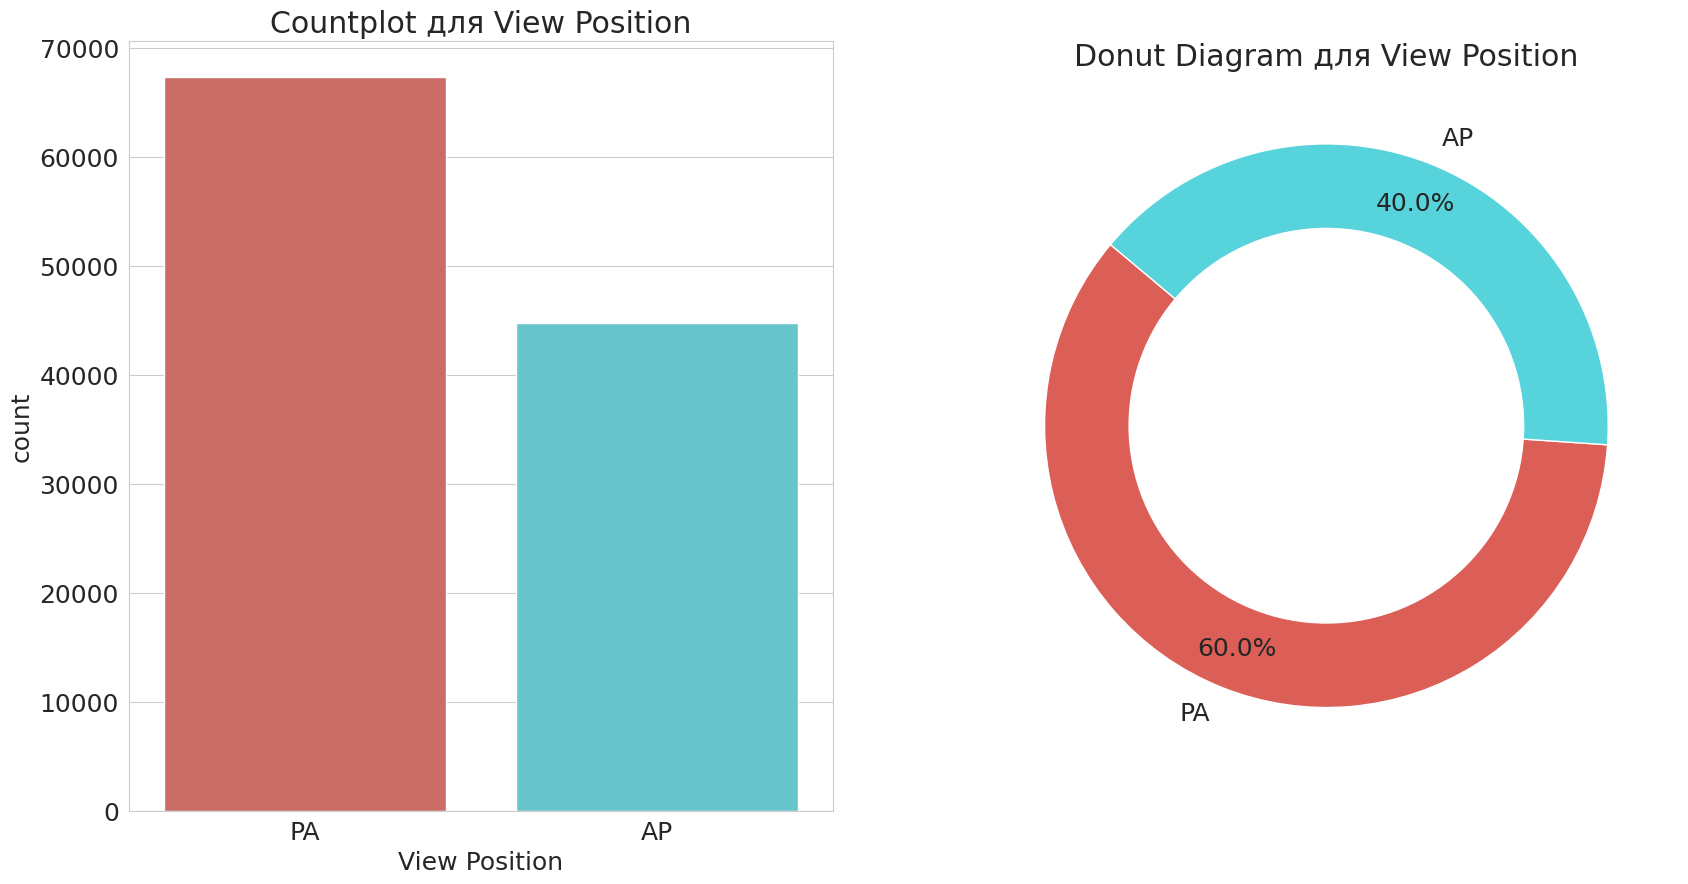

In [67]:
mpl.rcParams['font.size'] = 18

unique_values = df['View Position'].unique()
palette = dict(zip(unique_values, sns.color_palette("hls", len(unique_values))))

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(data=df, x='View Position', palette=palette, ax=ax[0])
ax[0].set_title(f'Countplot для View Position')
ax[0].tick_params(axis='x')

values = df['View Position'].value_counts()
ax[1].pie(values, labels=values.index, colors=[palette[val] for val in values.index], autopct='%1.1f%%', startangle=140, pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
ax[1].set_title(f'Donut Diagram для View Position')

plt.show()

# Пол

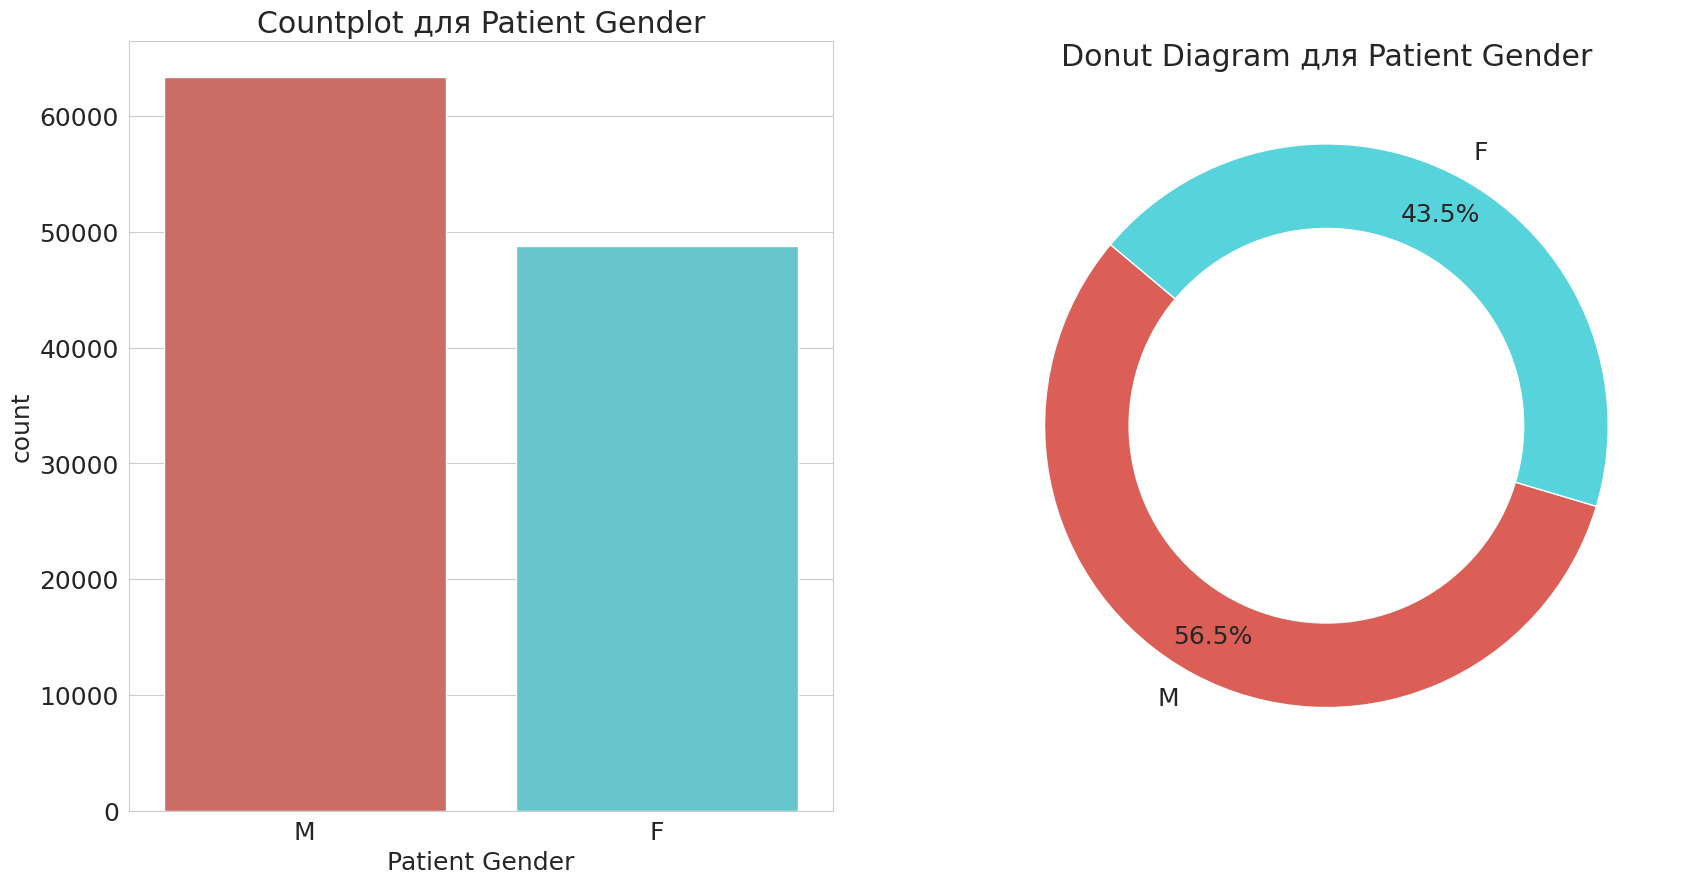

In [68]:
unique_values = df['Patient Gender'].unique()
palette = dict(zip(unique_values, sns.color_palette("hls", len(unique_values))))

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(data=df, x='Patient Gender', palette=palette, ax=ax[0])
ax[0].set_title(f'Countplot для Patient Gender')
ax[0].tick_params(axis='x')

values = df['Patient Gender'].value_counts()
ax[1].pie(values, labels=values.index, colors=[palette[val] for val in values.index], autopct='%1.1f%%', startangle=140, pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
ax[1].set_title(f'Donut Diagram для Patient Gender')

plt.show()